In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("/home/alberto/Documentos/MatchingLearning/Practicas/Moriarty2.csv",
                  usecols=["UUID","ActionType"])

df['UUID'] = pd.to_datetime(df['UUID'], unit="ms")
df['UUID'] = df['UUID'].dt.round('S')

df2 = pd.read_csv("/home/alberto/Documentos/MatchingLearning/Practicas/T4.csv",
                 usecols=["UUID", "CPU_0", "CPU_1", "CPU_2", "CPU_3", "Traffic_TotalRxBytes", 
                          "Traffic_TotalTxBytes", "MemFree"])

df2['UUID'] = pd.to_datetime(df['UUID'], unit="ms")
df2['UUID'] = df['UUID'].dt.round('S')

data = pd.merge(df,df2, on=['UUID'])
data['ActionType'] = data['ActionType'].replace(['malicious'], 1)
data['ActionType'] = data['ActionType'].replace(['benign'], 0)
data = data.drop('UUID', 1)
data


,ActionType,CPU_0,CPU_1,CPU_2,CPU_3,Traffic_TotalRxBytes,Traffic_TotalTxBytes,MemFree
0,1,45.833336,52.380955,80.000000,61.904762,0.0,40.0,61348.0
1,1,95.238100,5.000000,100.000000,21.052631,0.0,735.0,60728.0
2,1,72.727270,7.692308,78.947370,4.761905,5901.0,2809.0,69268.0
3,1,5.000000,4.761905,4.761905,4.545454,0.0,0.0,77116.0
4,1,95.238100,5.000000,100.000000,21.052631,0.0,735.0,60728.0
5,1,72.727270,7.692308,78.947370,4.761905,5901.0,2809.0,69268.0
6,1,5.000000,4.761905,4.761905,4.545454,0.0,0.0,77116.0
7,1,95.238100,5.000000,100.000000,21.052631,0.0,735.0,60728.0
8,1,72.727270,7.692308,78.947370,4.761905,5901.0,2809.0,69268.0
9,1,5.000000,4.761905,4.761905,4.545454,0.0,0.0,77116.0


# PCA.

In [3]:
from sklearn import preprocessing

scaler = preprocessing.StandardScaler()
datanorm = scaler.fit_transform(data)

In [4]:
from sklearn.decomposition import PCA

n_components = 2
estimator = PCA(n_components)
X_pca = estimator.fit_transform(datanorm)

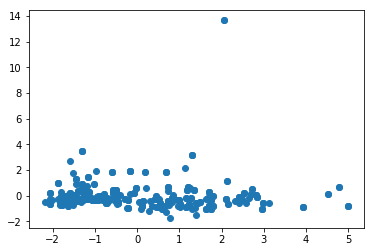

In [7]:
import numpy
import matplotlib.pyplot as plt

x = X_pca[:,0]
y = X_pca[:,1]
plt.scatter(x,y)
plt.show()

In [6]:
import os

directory = "../data/processed"

if not os.path.exists(directory):
    os.makedirs(directory)
    
data.to_csv(directory + "/MoriartyT4.csv")